## CyTOF gating hierarchy

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px

#Statistical Analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import display, HTML
%matplotlib inline
%config IPCompleter.greedy=True

df_hierarchy = pd.read_csv("data\cyTOF_gating.csv", sep=',')
#df_nhl = pd.read_csv("data\nhl.csv", sep=',')
#nhlDF = pd.read_csv("data\nhl.csv", sep=',')

In [12]:
display(HTML(df_hierarchy.to_html()))


,Parent,CellSubset,ClusterOn,CD3,CD19,CD56,CD66b,CD14,HLADR,gdTCR,CD4,CD8,CD25,CD127,CD45RA,CD27,CD38,CD24,IgD,CD123,CD16,CD1c,CD141,CD161
0,Root,CM-,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Root,T Cell,NaN,True,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Root,B Cell,NaN,False,True,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Root,CD14+ Monocyte,NaN,False,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Root,NK Cell,NaN,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Root,Granulocyte,NaN,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T Cell,NKT Cell,NaN,NaN,NaN,True,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,T Cell,gd T Cell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,T Cell,CD4+ T Cell,NaN,NaN,NaN,False,NaN,NaN,NaN,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CD4+ T Cell,CD4+ T Cell (Treg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df_hierarchy.head(5))


In [ ]:
df_hierarchy = pd.read_csv("data\cyTOF_gating.csv", sep=',')
df_hierarchy.set_index(['Parent','CellSubset','ClusterOn'], inplace=True)
df_hierarchy.sort_index(inplace=True)
# print(df_hierarchy.head(5))
# print(df_hierarchy.tail(5))
display(HTML(df_hierarchy.to_html()))



In [ ]:
print(df_hierarchy.index)

In [ ]:
df_hierarchy.xs('CD4+ T Cell (Effector Memory)', level='CellSubset')

In [ ]:
display(HTML(df_hierarchy.xs('T Cell',level=0).to_html()))

In [ ]:
display(HTML(df_hierarchy.to_html()))

In [3]:
import networkx as nx
#DiG = nx.from_pandas_edgelist(df_hierarchy, 'Parent', 'CellSubset', create_using=nx.DiGraph())
edges = pd.DataFrame(
    {
        "source": [0, 1, 2, 0],
        "target": [2, 2, 3, 2],
        "my_edge_key": ["A", "B", "C", "D"],
        "weight": [3, 4, 5, 6],
        "color": ["red", "blue", "blue", "blue"],
    }
)
edges


,source,target,my_edge_key,weight,color
0,0,2,A,3,red
1,1,2,B,4,blue
2,2,3,C,5,blue
3,0,2,D,6,blue


In [15]:
G = nx.from_pandas_edgelist(
    edges,
    edge_key="my_edge_key",
    edge_attr=["weight", "color"],
    create_using=nx.MultiGraph(),
)

graph_cyTOF = nx.from_pandas_edgelist(
    df_hierarchy,
    source="Parent",
    target="CellSubset",
    create_using=nx.MultiGraph(),
)



In [8]:
for n1 in G.nodes():
    for n2 in nx.ancestors(G, n1):
        print(n1,n2)


0 1
0 2
0 3
2 0
2 1
2 3
1 0
1 2
1 3
3 0
3 1
3 2


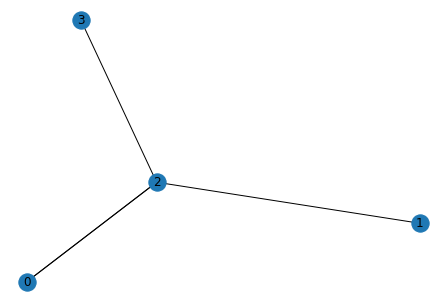

In [16]:
import matplotlib.pyplot as plt
#g_plot = nx.Graph()
nx.draw(G, with_labels=True)

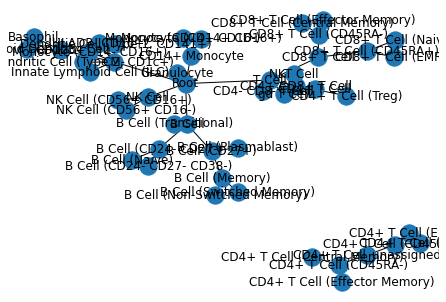

In [17]:
nx.draw(graph_cyTOF, with_labels=True)

KeyError: 0

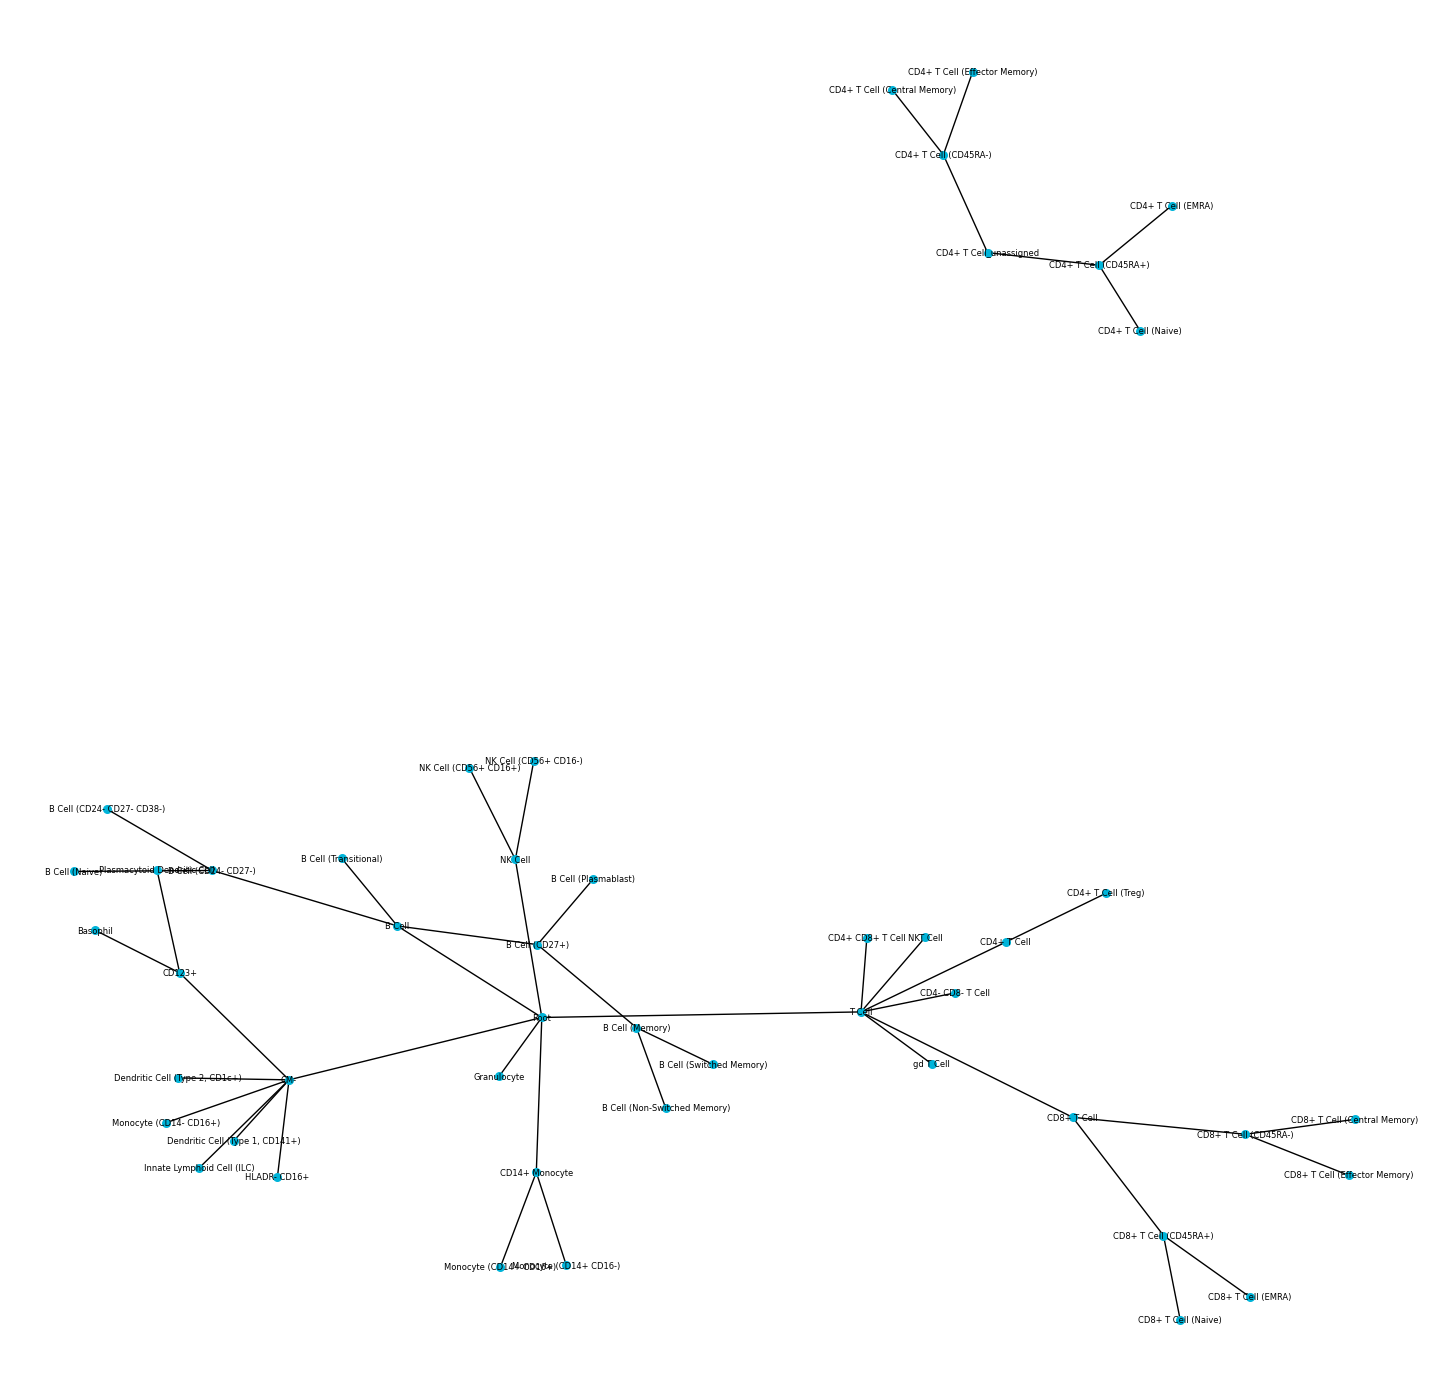

In [51]:
fig = plt.figure(figsize = (40, 40), dpi= 100)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
colors = range(20)
options = {
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    "font_size":6,
    "node_size":30,
    "node_color":"#00b4d9"
}
pos=nx.spring_layout(graph_cyTOF)
nx.draw_spring(graph_cyTOF, ax=ax1, **options)

x,y=pos[0]
plt.text(x,y+0.1,s='some text', bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')

plt.show()
